In [2]:
import pandas as pd

# Replace 'path_to_file' with the actual path to your CSV file
csv_file_path = "C:\Professional\MS\SHU\Dissertation\Input_data\Age_and_sex.csv"

# Read the CSV file into a pandas DataFrame, skipping the first row (header)
df = pd.read_csv(csv_file_path, skiprows=1)


C:\Users\nikhi\AppData\Local\Temp\ipykernel_13056\333382464.py:7: DtypeWarning: Columns (3,4,7,8,19,20,24,25,27,28,31,32,43,44,47,48,80,81,84,85,88,89,92,93,96,97,104,105,120,121,124,125,307,308,312,313,323,324,327,328,331,332,335,336,347,348,351,352,384,385,388,389,392,393,396,397,399,400,408,409,424,425,428,429,611,612,615,616,627,628,631,632,635,636,639,640,651,652,655,656,687,688,692,693,695,696,700,701,704,705,712,713,728,729,731,732) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path, skiprows=1)


In [3]:

# Include the 'Geography' column in the list of columns to extract
desired_columns = ['Geography'] + [col for col in df.columns if col.startswith('Estimate') and ('SELECTED AGE CATEGORIES' not in col and 'Percent' not in col and 'Estimate!!Total!!Total population!!' not in col)]

# Extract the desired columns
df_extracted = df[desired_columns]

# Display the extracted DataFrame
print(df_extracted)

# Verify the columns that were removed are not required in the analysis
removed_columns = list(set(df.columns) - set(df_extracted.columns))


            Geography  Estimate!!Total!!Total population  \
0      860Z200US00601                              17126   
1      860Z200US00602                              37895   
2      860Z200US00603                              49136   
3      860Z200US00606                               5751   
4      860Z200US00610                              26153   
...               ...                                ...   
33769  860Z200US99923                                 13   
33770  860Z200US99925                                917   
33771  860Z200US99926                               1445   
33772  860Z200US99927                                 11   
33773  860Z200US99929                               2161   

       Estimate!!Male!!Total population  \
0                                  8451   
1                                 18588   
2                                 23817   
3                                  2817   
4                                 12678   
...                  

In [4]:
# Create a list of columns related to age
age_columns = [col for col in df_extracted.columns if "AGE" in col]

# Create a new DataFrame containing only the 'Geography' and age and sex related columns
age_dataframe = df_extracted[['Geography'] + age_columns]

# Pivot age_dataframe
age_dataframe_melted = pd.melt(age_dataframe, id_vars=['Geography'], value_vars=age_columns,
                              var_name='Population', value_name='Total_Population')

age_pivot_table = pd.pivot_table(age_dataframe_melted, index=['Geography', 'Population'], 
                                 values='Population', aggfunc='sum')

# Display the pivot table for age_dataframe
print("\nPivot Table for Age DataFrame:")
age_pivot_table


Pivot Table for Age DataFrame:


Total_Population
Geography      Population                                                          
860Z200US00601 Estimate!!Female!!Total population!!AGE!!10 to ...               633
               Estimate!!Female!!Total population!!AGE!!15 to ...               463
               Estimate!!Female!!Total population!!AGE!!20 to ...               485
               Estimate!!Female!!Total population!!AGE!!25 to ...               517
               Estimate!!Female!!Total population!!AGE!!30 to ...               521
...                                                                             ...
860Z200US99929 Estimate!!Male!!Total population!!AGE!!70 to 74...                61
               Estimate!!Male!!Total population!!AGE!!75 to 79...                23
               Estimate!!Male!!Total population!!AGE!!80 to 84...               104
               Estimate!!Male!!Total population!!AGE!!85 years...                31
               Estimate!!Male!!Total population!!AGE!!Under 5 ...                74

[1215864 rows x 1 columns]

In [5]:
# Convert age_pivot_table to a DataFrame
age_pivot_table_df = age_pivot_table.reset_index()

# Display the age_pivot_table_df
print("\nAge Pivot Table as DataFrame:")
age_pivot_table_df


Age Pivot Table as DataFrame:


,Geography,Population,Total_Population
0,860Z200US00601,Estimate!!Female!!Total population!!AGE!!10 to...,633
1,860Z200US00601,Estimate!!Female!!Total population!!AGE!!15 to...,463
2,860Z200US00601,Estimate!!Female!!Total population!!AGE!!20 to...,485
3,860Z200US00601,Estimate!!Female!!Total population!!AGE!!25 to...,517
4,860Z200US00601,Estimate!!Female!!Total population!!AGE!!30 to...,521
...,...,...,...
1215859,860Z200US99929,Estimate!!Male!!Total population!!AGE!!70 to 7...,61
1215860,860Z200US99929,Estimate!!Male!!Total population!!AGE!!75 to 7...,23
1215861,860Z200US99929,Estimate!!Male!!Total population!!AGE!!80 to 8...,104
1215862,860Z200US99929,Estimate!!Male!!Total population!!AGE!!85 year...,31


In [30]:
# Checking for missing values
missing_values = grouped.isnull().sum()

print("Missing Values:")
print(missing_values)

Missing Values:
Geography            0
Sex                  0
Age_Group_Grouped    0
Total_Population     0
dtype: int64


In [6]:
# Extracting the sex as a new variable
age_pivot_table_df['Sex'] = age_pivot_table_df['Population'].str.split("!!").str[1]

# Extracting the Age_Group as a new variable
age_pivot_table_df['Age_Group'] = age_pivot_table_df['Population'].str.split("!!").str[4]

# Remove the index
age_pivot_table_df=age_pivot_table_df.drop(columns=['Population'],axis=1).reset_index()

# Rearrange the columns
age_pivot_table_df = age_pivot_table_df[['Geography','Sex','Age_Group', 'Total_Population']]


In [7]:
# Save the output to a csv
age_pivot_table_df.to_csv('pivot_table_output.csv',index=False)

In [8]:
# print(age_pivot_table_df.reset_index(drop=True).head())
age_pivot_table_df

,Geography,Sex,Age_Group,Total_Population
0,860Z200US00601,Female,10 to 14 years,633
1,860Z200US00601,Female,15 to 19 years,463
2,860Z200US00601,Female,20 to 24 years,485
3,860Z200US00601,Female,25 to 29 years,517
4,860Z200US00601,Female,30 to 34 years,521
...,...,...,...,...
1215859,860Z200US99929,Male,70 to 74 years,61
1215860,860Z200US99929,Male,75 to 79 years,23
1215861,860Z200US99929,Male,80 to 84 years,104
1215862,860Z200US99929,Male,85 years and over,31


In [9]:
# Get unique categories
unique_categories = len(age_pivot_table_df['Age_Group'].unique())
unique_categories1 = age_pivot_table_df['Age_Group'].unique()
print("Unique Categories:", unique_categories)

Unique Categories: 18


In [10]:
# Mapping for age groups
age_mapping = {
    "Under 5 years": "Under 20",
    "5 to 9 years": "Under 20",
    "10 to 14 years": "Under 20",
    "15 to 19 years": "Under 20",
    "20 to 24 years": "20-44",
    "25 to 29 years": "20-44",
    "30 to 34 years": "20-44",
    "35 to 39 years": "20-44",
    "40 to 44 years": "20-44",
    "45 to 49 years": "44 years and over",
    "50 to 54 years": "44 years and over",
    "55 to 59 years": "44 years and over",
    "60 to 64 years": "44 years and over",
    "65 to 69 years": "44 years and over",
    "70 to 74 years": "44 years and over",
    "75 to 79 years": "44 years and over",
    "80 to 84 years": "44 years and over",
    "85 years and over": "44 years and over"
}

# Apply the mapping to create a new column
age_pivot_table_df['Age_Group_Grouped'] = age_pivot_table_df['Age_Group'].map(age_mapping)

# Group by Sex and Age_Group_Grouped
grouped = age_pivot_table_df.groupby(['Geography','Sex', 'Age_Group_Grouped'])['Total_Population'].sum()

grouped=grouped.reset_index()




In [11]:
# Get unique categories
unique_categories = len(grouped['Age_Group_Grouped'].unique())
unique_categories1 = grouped['Age_Group_Grouped'].unique()
print("Unique Categories:", unique_categories1)

Unique Categories: ['20-44' '44 years and over' 'Under 20']


In [12]:
grouped

,Geography,Sex,Age_Group_Grouped,Total_Population
0,860Z200US00601,Female,20-44,2567
1,860Z200US00601,Female,44 years and over,4345
2,860Z200US00601,Female,Under 20,1763
3,860Z200US00601,Male,20-44,2576
4,860Z200US00601,Male,44 years and over,4002
...,...,...,...,...
202639,860Z200US99929,Female,44 years and over,485
202640,860Z200US99929,Female,Under 20,234
202641,860Z200US99929,Male,20-44,339
202642,860Z200US99929,Male,44 years and over,597


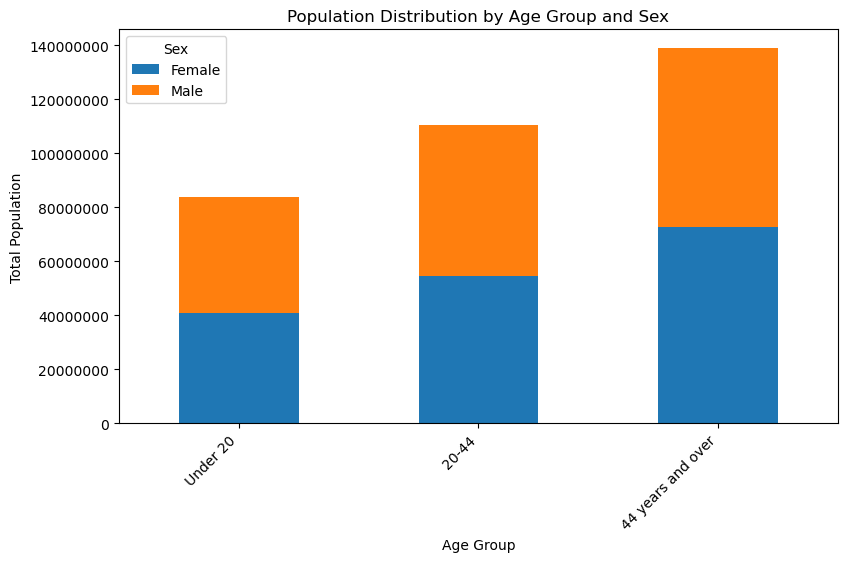

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker

# Define the desired order for age groups
desired_order = ['Under 20', '20-44', '44 years and over']

# Reorder the age groups in the DataFrame
grouped['Age_Group_Grouped'] = pd.Categorical(grouped['Age_Group_Grouped'], categories=desired_order, ordered=True)
grouped = grouped.sort_values('Age_Group_Grouped')

# Pivot the data
pivot_table = grouped.pivot_table(values='Total_Population', index='Age_Group_Grouped', columns='Sex', aggfunc='sum')

# Plotting
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Age Group')
plt.ylabel('Total Population')
plt.title('Population Distribution by Age Group and Sex')
plt.legend(title='Sex')
plt.tight_layout()

# Rotate x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set y-axis format to display integers only
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))

# Display the plot
plt.show()


In [66]:
# Group by Age_Group_Grouped and Sex, then calculate the count
population_count = grouped.groupby(['Age_Group_Grouped', 'Sex'])['Total_Population'].sum().reset_index()

# Display the count
print(population_count)

   Age_Group_Grouped     Sex  Total_Population
0           Under 20  Female          40861486
1           Under 20    Male          42821581
2              20-44  Female          54608490
3              20-44    Male          55816983
4  44 years and over  Female          72786952
5  44 years and over    Male          66137442


In [69]:
# Group by Age_Group_Grouped, then calculate the count
population_count = grouped.groupby(['Age_Group_Grouped'])['Total_Population'].sum().reset_index()

# Display the count
print(population_count)

   Age_Group_Grouped  Total_Population
0           Under 20          83683067
1              20-44         110425473
2  44 years and over         138924394


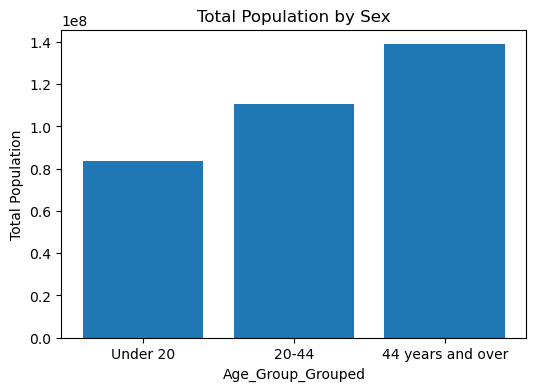

In [70]:
# Create a bar graph
plt.figure(figsize=(6, 4))
plt.bar(population_count['Age_Group_Grouped'], population_count['Total_Population'])
plt.xlabel('Age_Group_Grouped')
plt.ylabel('Total Population')
plt.title('Total Population by Sex')
# Set y-axis format to display integers only
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
plt.show()

In [71]:
# Group by sex, then calculate the count
population_count = grouped.groupby(['Sex'])['Total_Population'].sum().reset_index()

# Display the count
print(population_count)

      Sex  Total_Population
0  Female         168256928
1    Male         164776006


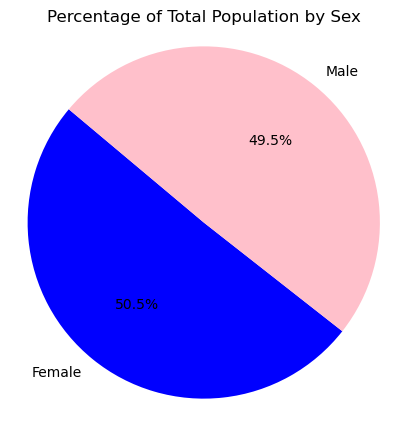

In [75]:
population_count = grouped.groupby(['Sex'])['Total_Population'].sum().reset_index()
population_count['Percentage'] = (population_count['Total_Population'] / population_count['Total_Population'].sum()) * 100

# Create a bar graph with percentages

plt.figure(figsize=(5, 5))
plt.pie(population_count['Percentage'], labels=population_count['Sex'], autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])
plt.title('Percentage of Total Population by Sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

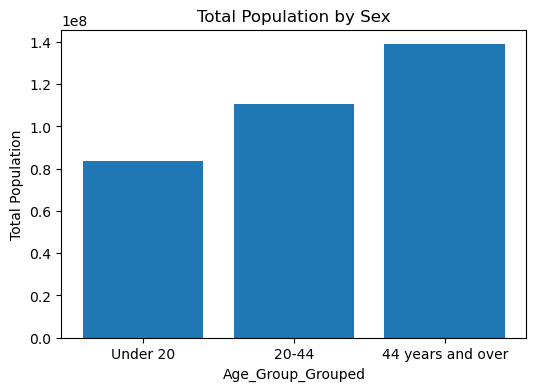

In [39]:
pivot_table = grouped.pivot_table(index='Age_Group_Grouped', columns=['Sex'], values='Total_Population', aggfunc='sum')
pivot_table.columns = [f'{col[0]}: {col[1]}' for col in pivot_table.columns]
pivot_table['Total_Population'] = pivot_table.sum(axis=1)
print(pivot_table.reset_index())


   Age_Group_Grouped      F: e      M: a  Total_Population
0           Under 20  40861486  42821581          83683067
1              20-44  54608490  55816983         110425473
2  44 years and over  72786952  66137442         138924394


In [50]:
pivot_table = grouped.pivot_table(index="Geography", columns=["Sex", "Age_Group_Grouped"], values="Total_Population", aggfunc="sum")
pivot_table = grouped.pivot_table(index='Geography', columns=['Sex', 'Age_Group_Grouped'], values='Total_Population', aggfunc='sum')
pivot_table.columns = [f'{col[0]}: {col[1]}' for col in pivot_table.columns]
pivot_table['Total_Population'] = pivot_table.sum(axis=1)
print(pivot_table.reset_index())
pivot_table.to_csv("C:\Professional\MS\SHU\Dissertation\Output_data\dem\Age_sex.csv",index=True)

            Geography  Female: Under 20  Female: 20-44  \
0      860Z200US00601              1763           2567   
1      860Z200US00602              3621           5862   
2      860Z200US00603              4914           7450   
3      860Z200US00606               617            807   
4      860Z200US00610              2488           4085   
...               ...               ...            ...   
33769  860Z200US99923                 0              0   
33770  860Z200US99925                71            143   
33771  860Z200US99926               184            169   
33772  860Z200US99927                 0              0   
33773  860Z200US99929               234            218   

       Female: 44 years and over  Male: Under 20  Male: 20-44  \
0                           4345            1873         2576   
1                           9824            3730         5966   
2                          12955            5291         7418   
3                           1510           